# Betrekking (Aanspreking van de lezer)
## Details
> Wanneer    lezers    worden    aangesproken    in    de krantenkop,  voelen  ze  zich  al  meer  geroepen  en geneigd  om  het  artikel  te  lezen,  omdat  ze  zich betrokken voelen bij de zaak.
## Example
> Onze hittetips: hoe raak *ik* deze dagen in slaap? Wat helpt tegen *okselvijvers*?

## Data

In [1]:
from util import get_cls_train_test

train_x, train_y, test_x, test_y = get_cls_train_test("Betrekking")
train_y.value_counts()

0    631
1     50
Name: Betrekking, dtype: int64

## Approach 1: Tf-idf
With tf-idf or just a count vectorizer, we might already achieve quite a good result, since it just needs to learn some adjectives.

f-score: 0.4
Confusion matrix: (TP: 200, FP: 4, FN: 17, TN: 7)
Accuracy=90.79% (207/228)


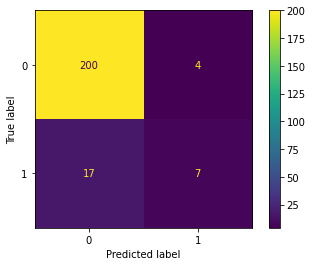

In [2]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

from util import fit_predict_evaluate

model = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

fit_predict_evaluate(model, train_x, train_y, test_x, test_y)

In [3]:
from util import show_most_informative_features
show_most_informative_features(model)

2.5335             je    -0.8586             ze
1.3625         waarom    -0.7573             is
1.3215           bent    -0.6507            man
1.1649          haten    -0.6170           geen
1.1649          vogel    -0.5624            van
1.0559           hier    -0.5522          nooit
1.0535             uw    -0.5496          tegen
1.0499          klaar    -0.5318             wk
1.0212lievelingsfilms    -0.5220           gaat
1.0145           best    -0.5155          vrouw


The top positive words seem to make sense in terms of talking to the reader.

## Approach 2: TF-idf + Stemming
Since singular or prular forms might result in the same classification, let's see what the added effect of stemming is:

f-score: 0.4
Confusion matrix: (TP: 200, FP: 4, FN: 17, TN: 7)
Accuracy=90.79% (207/228)


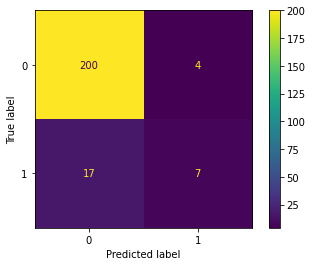

In [4]:
from util import stem_analyzer
model = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer=stem_analyzer)),
    ('resampler', SMOTETomek(random_state=0)),
    ('classifier', svm.LinearSVC(random_state=0))
])

fit_predict_evaluate(model, train_x, train_y, test_x, test_y)

This didn't make any difference.